# Discussion 5: Earthquakes & Git Branching

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Load earthquake data
earthquake_path = os.path.join('data', 'earthquake_data.csv')
earthquake_data = pd.read_csv(earthquake_path)

In [3]:
# Load country boundaries
country_path = os.path.join('data', 'ne_110m_admin_0_countries','ne_110m_admin_0_countries.shp')
country_data = gpd.read_file(country_path)

In [4]:
# Filter to 6.5 magnitude or higher
earthquake_filtered = earthquake_data[earthquake_data['mag'] >= 6.5].copy()

# Convert to gpdf
points = gpd.points_from_xy(earthquake_filtered.longitude,
                            earthquake_filtered.latitude)

earthquakes_gdf = gpd.GeoDataFrame(earthquake_filtered,
                                   geometry = points,
                                   crs=country_data.crs)

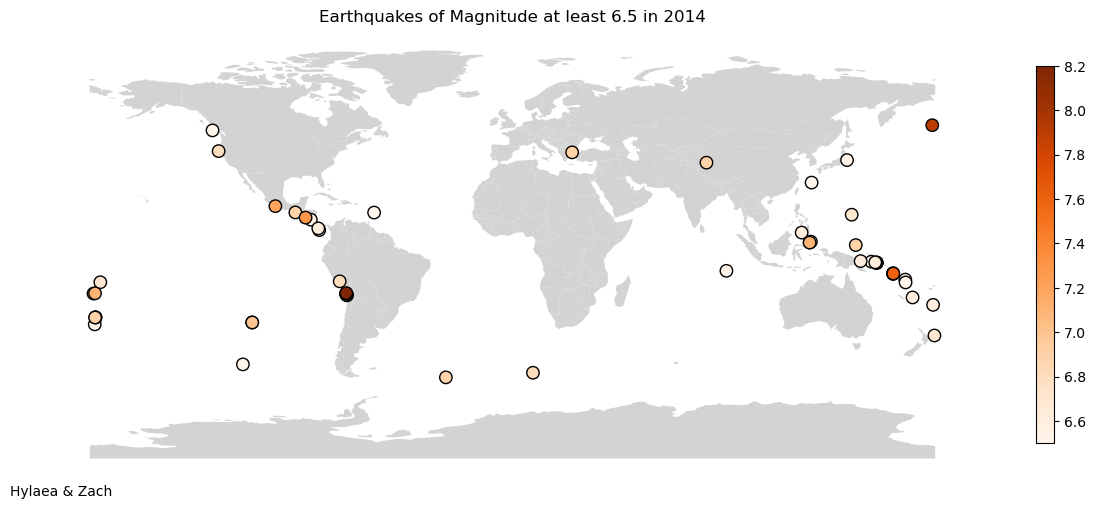

In [28]:
# Plot countries
fig, ax = plt.subplots(figsize=(15,7))

ax.axis('off')

country_data.plot(ax=ax,
                  facecolor='lightgrey')

earthquakes_gdf.plot(ax=ax,
                     column='mag',
                     markersize=80,
                     legend=True,
                     cmap='Oranges',
                     edgecolor='black',
                     legend_kwds={
                         'shrink':0.7
                     })

plt.title("Earthquakes of Magnitude at least 6.5 in 2014")
plt.figtext(x = 0.1, y = 0.15, s = "Hylaea & Zach")
plt.show()


Great work!